# FIRST INTERVENTION (First AWS Training)
Version 1

'''
Author: Sharon-Yasotha Veerayah-McGregor 
Date: July 17th, 2020
Summer 2020 Research Science Intern
'''

In [1]:
# GRT WIKI
# GRT PowerPoint/PDF (EDA, Results, Models)
# GRT Office Hours


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
#import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [5]:
#Load  -  AWS_TC_DSI_MERGED_June30
# 18 month data column extracted and added
#dataset = pd.read_csv('AWS_TC_DSI_MERGED_July02.csv')
# 653 unique customers with DSI - original dataset had 3357 rows , reduced to 2700 with dates after 18months inclusive
#----------------------------
#Dta from: https://www.kaggle.com/leventoz/food-prices-in-turkey?select=test.csv

dataset = pd.read_csv('train.csv')
DSI_ID_merged = dataset
DSI_ID_merged.shape

(7381, 8)

In [7]:
AWS_DSI = DSI_ID_merged
AWS_DSI.columns


Index(['Place', 'ProductId', 'ProductName', 'UmId', 'UmName', 'Month', 'Year',
       'Price'],
      dtype='object')

In [9]:
AWS_DSI = AWS_DSI.dropna()
AWS_DSI

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

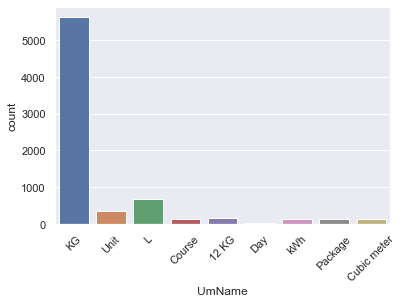

In [12]:
# Training bar chart
AWS_DSI9 =AWS_DSI
sns.countplot(x='UmName',data=AWS_DSI9)
#matplotlib.rc('figure', figsize=(5, 5))
plt.xticks(rotation=45)

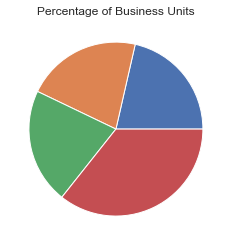

In [14]:
# Business units pie chart
plt.figure()
count = AWS_DSI9.groupby('Place').size()
values = count
plt.pie(values)

plt.title('Percentage of Business Units')
plt.show()

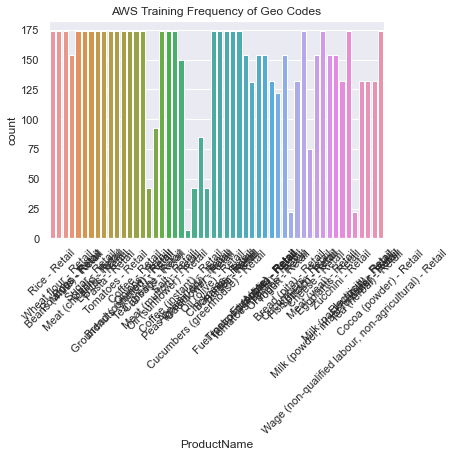

In [15]:
# AWS Trainings 
# Geo AWS_Feature

sns.countplot(x='ProductName',data= AWS_DSI9)
matplotlib.rc('figure', figsize=(8, 12))
plt.xticks(rotation=45)
plt.title('AWS Training Frequency of Geo Codes')

plt.show()

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

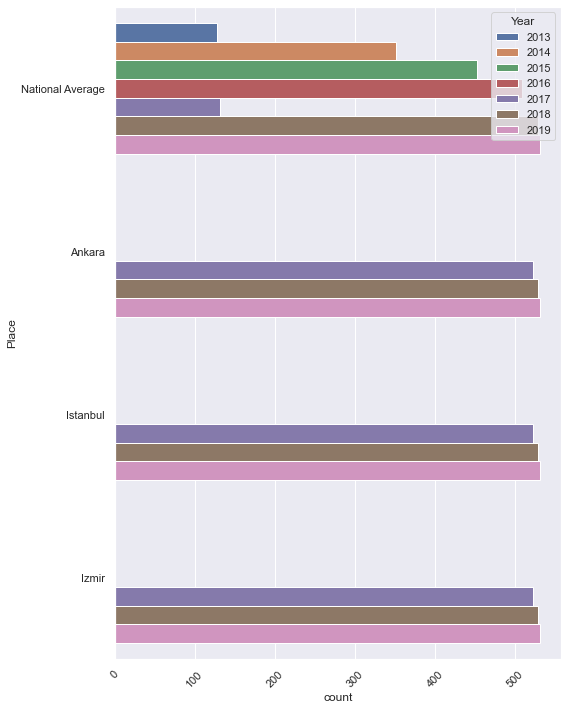

In [16]:
#AWS_DSI9
sns.countplot(y='Place',hue='Year',data=AWS_DSI9)

# change default size of my graph
import matplotlib
matplotlib.rc('figure', figsize=(10, 12))

plt.xticks(rotation=45)

In [17]:
list(AWS_DSI)

['Place',
 'ProductId',
 'ProductName',
 'UmId',
 'UmName',
 'Month',
 'Year',
 'Price']

<ipython-input-19-715ee2ca6edc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['log_dsi'] = np.log1p(ds['Price'])


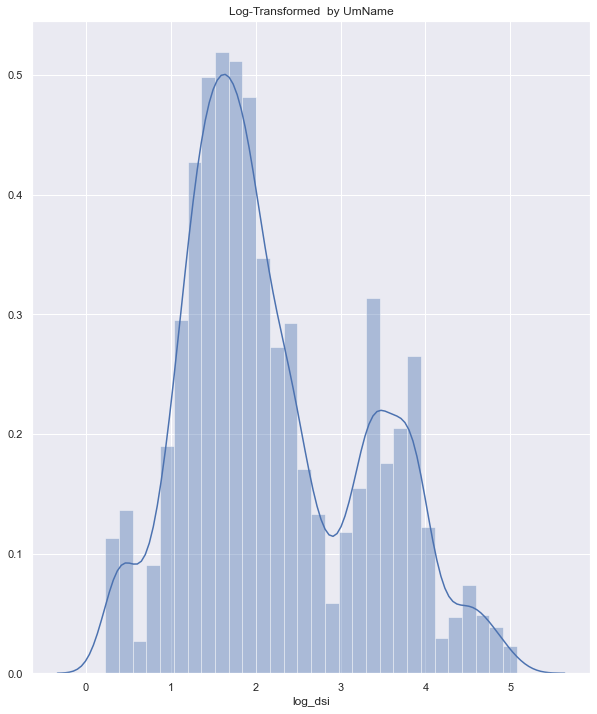

In [19]:
# Log transformation
# Logarithms can naturally reduce the dynamic range of a variable 
# So the differences are preserved while the scale is not that dramatically skewed.
ds = AWS_DSI[['UmName','Price']]
ds['log_dsi'] = np.log1p(ds['Price'])
sns.distplot(ds['log_dsi'],  color='b')
plt.title("Log-Transformed  by UmName")
plt.show()

/Users/sharonya/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sharonya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


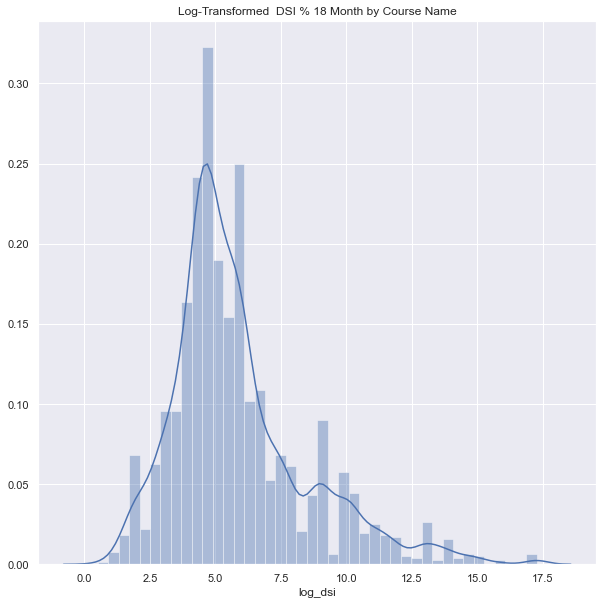

In [21]:
# Log transformation
# Logarithms can naturally reduce the dynamic range of a variable 
# So the differences are preserved while the scale is not that dramatically skewed.
ds = AWS_DSI[['AWS_Course_Name','DSI_18Month']]
ds['log_dsi'] = np.log1p(ds['DSI_18Month'])
sns.distplot(ds['log_dsi'])
plt.title("Log-Transformed  DSI % 18 Month by Course Name")
plt.show()

In [20]:
ds

,UmName,Price,log_dsi
0,KG,4.4920,1.703292
1,KG,4.5786,1.718938
2,KG,4.7865,1.755528
3,KG,5.1337,1.813798
4,KG,5.5099,1.873324
...,...,...,...
7376,KG,47.9040,3.889859
7377,KG,49.1176,3.914372
7378,KG,50.8347,3.948060
7379,KG,51.7985,3.966483


# ORIGINAL DATASET

In [21]:
AWS_DSI.nunique(), 
AWS_DSI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 839.0+ KB


In [22]:

AWS_DSI0 = AWS_DSI
AWS_DSI0.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [23]:
AWS_DSI0.nunique()

Place             4
ProductId        52
ProductName      52
UmId              9
UmName            9
Month            12
Year              7
Price          6596
dtype: int64

# EDA OF ORIGINAL DATASET

In [24]:
AWS_DSI.head(2)

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786


# RUN ORIGINAL DATASET AS UNIQUE ID AND VARIOUS TRAININGS TYPE

In [26]:
df_original = AWS_DSI


piv = (df_original.pivot_table(index=['Place',  'ProductName',
       'Month', 'Year', 'Price'], columns=['UmName'], 
                      aggfunc='size', fill_value=0)).reset_index()

piv.columns = piv.columns.ravel()

piv

,Place,ProductName,Month,Year,Price,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,Ankara,Apples - Retail,1,2017,2.5062,0,0,0,0,1,0,0,0,0
1,Ankara,Apples - Retail,1,2018,3.3122,0,0,0,0,1,0,0,0,0
2,Ankara,Apples - Retail,1,2019,3.9239,0,0,0,0,1,0,0,0,0
3,Ankara,Apples - Retail,2,2017,2.6311,0,0,0,0,1,0,0,0,0
4,Ankara,Apples - Retail,2,2018,3.4349,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,National Average,Zucchini - Retail,10,2019,4.1116,0,0,0,0,1,0,0,0,0
7377,National Average,Zucchini - Retail,11,2018,3.9244,0,0,0,0,1,0,0,0,0
7378,National Average,Zucchini - Retail,11,2019,3.7613,0,0,0,0,1,0,0,0,0
7379,National Average,Zucchini - Retail,12,2018,5.0772,0,0,0,0,1,0,0,0,0


In [27]:
data = piv

In [28]:
data.nunique()

Place             4
ProductName      52
Month            12
Year              7
Price          6596
12 KG             2
Course            2
Cubic meter       2
Day               2
KG                2
L                 2
Package           2
Unit              2
kWh               2
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductName  7381 non-null   object 
 2   Month        7381 non-null   int64  
 3   Year         7381 non-null   int64  
 4   Price        7381 non-null   float64
 5   12 KG        7381 non-null   int64  
 6   Course       7381 non-null   int64  
 7   Cubic meter  7381 non-null   int64  
 8   Day          7381 non-null   int64  
 9   KG           7381 non-null   int64  
 10  L            7381 non-null   int64  
 11  Package      7381 non-null   int64  
 12  Unit         7381 non-null   int64  
 13  kWh          7381 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 807.4+ KB


# DATA PREPROCESSING
#JULY 6th

In [30]:
df1 = data.drop(['Place',  'ProductName',
      'Year', 'Price'], axis = 1)
df1

,Month,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0
3,2,0,0,0,0,1,0,0,0,0
4,2,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7376,10,0,0,0,0,1,0,0,0,0
7377,11,0,0,0,0,1,0,0,0,0
7378,11,0,0,0,0,1,0,0,0,0
7379,12,0,0,0,0,1,0,0,0,0


In [31]:
df2 = data[['Place',  'ProductName',
        'Year', 'Price']]
df2

,Place,ProductName,Year,Price
0,Ankara,Apples - Retail,2017,2.5062
1,Ankara,Apples - Retail,2018,3.3122
2,Ankara,Apples - Retail,2019,3.9239
3,Ankara,Apples - Retail,2017,2.6311
4,Ankara,Apples - Retail,2018,3.4349
...,...,...,...,...
7376,National Average,Zucchini - Retail,2019,4.1116
7377,National Average,Zucchini - Retail,2018,3.9244
7378,National Average,Zucchini - Retail,2019,3.7613
7379,National Average,Zucchini - Retail,2018,5.0772


In [34]:
A = data.iloc[:, 5:54]
A

,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7376,0,0,0,0,1,0,0,0,0
7377,0,0,0,0,1,0,0,0,0
7378,0,0,0,0,1,0,0,0,0
7379,0,0,0,0,1,0,0,0,0


In [35]:
df = data
df['Total']= df.iloc[:, 5:54].sum(axis=1)

In [36]:
df

,Place,ProductName,Month,Year,Price,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh,Total
0,Ankara,Apples - Retail,1,2017,2.5062,0,0,0,0,1,0,0,0,0,1
1,Ankara,Apples - Retail,1,2018,3.3122,0,0,0,0,1,0,0,0,0,1
2,Ankara,Apples - Retail,1,2019,3.9239,0,0,0,0,1,0,0,0,0,1
3,Ankara,Apples - Retail,2,2017,2.6311,0,0,0,0,1,0,0,0,0,1
4,Ankara,Apples - Retail,2,2018,3.4349,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,National Average,Zucchini - Retail,10,2019,4.1116,0,0,0,0,1,0,0,0,0,1
7377,National Average,Zucchini - Retail,11,2018,3.9244,0,0,0,0,1,0,0,0,0,1
7378,National Average,Zucchini - Retail,11,2019,3.7613,0,0,0,0,1,0,0,0,0,1
7379,National Average,Zucchini - Retail,12,2018,5.0772,0,0,0,0,1,0,0,0,0,1


In [39]:
y = df[['Month']]
pd.value_counts(y.Month, normalize = True)

11    0.089419
12    0.089419
3     0.089012
2     0.089012
1     0.089012
6     0.083051
10    0.082916
5     0.082645
9     0.077361
7     0.077090
8     0.077090
4     0.073974
Name: Month, dtype: float64

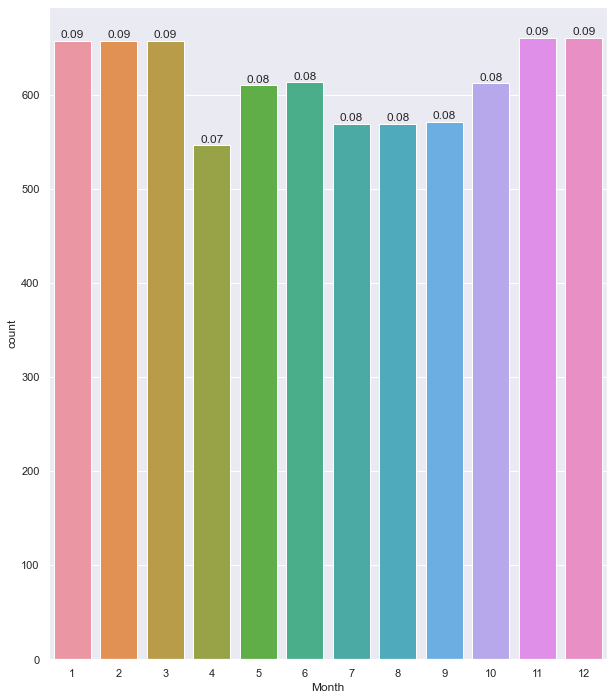

In [40]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")

total = float(len(df)) # one customer/training per row 
ax = sns.countplot(x="Month", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
figsize=(5, 4)
show()

# SEPARATE ENCODED DATASET AND THEN CONCATENATE

# ONE HOT ENCODING

In [41]:
df2 = pd.get_dummies(df2)
df2

,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,...,ProductName_Tea (herbal) - Retail,ProductName_Tea - Retail,ProductName_Tomatoes (paste) - Retail,ProductName_Tomatoes - Retail,ProductName_Transport (public) - Retail,"ProductName_Wage (non-qualified labour, non-agricultural) - Retail",ProductName_Water - Retail,ProductName_Wheat flour - Retail,ProductName_Yogurt - Retail,ProductName_Zucchini - Retail
0,2017,2.5062,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,3.3122,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,3.9239,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,2.6311,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,3.4349,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,2019,4.1116,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7377,2018,3.9244,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7378,2019,3.7613,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7379,2018,5.0772,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# Concatenate
#Cpncate 
df4 = pd.concat([df2, df1], axis = 1)
df4

,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,...,Month,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,2017,2.5062,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2018,3.3122,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,2019,3.9239,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2017,2.6311,1,0,0,0,0,1,0,0,...,2,0,0,0,0,1,0,0,0,0
4,2018,3.4349,1,0,0,0,0,1,0,0,...,2,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,2019,4.1116,0,0,0,1,0,0,0,0,...,10,0,0,0,0,1,0,0,0,0
7377,2018,3.9244,0,0,0,1,0,0,0,0,...,11,0,0,0,0,1,0,0,0,0
7378,2019,3.7613,0,0,0,1,0,0,0,0,...,11,0,0,0,0,1,0,0,0,0
7379,2018,5.0772,0,0,0,1,0,0,0,0,...,12,0,0,0,0,1,0,0,0,0


In [43]:
y =df4[['Month']]
y

,Month
0,1
1,1
2,1
3,2
4,2
...,...
7376,10
7377,11
7378,11
7379,12


In [43]:
# CREATE CHECKPOINT
# INTERIM SAVE OF WORK
#CREATE A COPY OF RTH CURRENT DF a temporary dataset

In [44]:
targets = np.where(df4['Month'] > df4['Month'].median(), 1, 0)
targets

array([0, 0, 0, ..., 1, 1, 1])

In [45]:
#Create Target
targets.sum() /targets.shape[0]

0.4932935916542474

In [46]:
df4['Month'] = targets

In [47]:
# SELECT INPUT AND TARGETS

In [47]:
# select the input
X = df4.drop(['Month'], axis = 1)
y = df4['Month']


In [48]:
X

,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,...,ProductName_Zucchini - Retail,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,2017,2.5062,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018,3.3122,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2019,3.9239,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2017,2.6311,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,3.4349,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,2019,4.1116,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7377,2018,3.9244,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7378,2019,3.7613,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7379,2018,5.0772,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [49]:

unscaled_inputs = X
unscaled_inputs

,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,...,ProductName_Zucchini - Retail,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,2017,2.5062,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018,3.3122,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2019,3.9239,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2017,2.6311,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,3.4349,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,2019,4.1116,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7377,2018,3.9244,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7378,2019,3.7613,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7379,2018,5.0772,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [50]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7376    1
7377    1
7378    1
7379    1
7380    1
Name: Month, Length: 7381, dtype: int32

# Standardize the Data

In [51]:
#from sklearn.preprocessing import StandardScaler
#DSI_scaler = StandardScaler()

In [52]:
# this is Custom Scale class --- we didnt need the Standard Scaler if I use this
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self,columns, copy = True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns = self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis = 1)[init_col_order]

In [54]:
columns_to_scale=unscaled_inputs.columns.values

In [55]:
DSI_scaler = CustomScaler(columns_to_scale)

C:\Users\sharo\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [56]:
# Scale our data - mean and SD of DSI
# X i sunscaled
DSI_scaler.fit(unscaled_inputs)

C:\Users\sharo\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CustomScaler(columns=array(['Year', 'Price', 'Place_Ankara', 'Place_Istanbul', 'Place_Izmir',
       'Place_National Average', 'ProductName_Apples (red) - Retail',
       'ProductName_Apples - Retail', 'ProductName_Bananas - Retail',
       'ProductName_Beans (white) - Retail',
       'ProductName_Bread (common) - Retail',
       'ProductName_Bread (pita) - Retail', 'ProductName_Bulgur - Retail',
       'ProductName_Cabb...
       'ProductName_Tomatoes - Retail',
       'ProductName_Transport (public) - Retail',
       'ProductName_Wage (non-qualified labour, non-agricultural) - Retail',
       'ProductName_Water - Retail', 'ProductName_Wheat flour - Retail',
       'ProductName_Yogurt - Retail', 'ProductName_Zucchini - Retail',
       '12 KG', 'Course', 'Cubic meter', 'Day', 'KG', 'L', 'Package',
       'Unit', 'kWh'], dtype=object),
             copy=None, with_mean=None, with_std=None)

In [57]:
X

,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,...,ProductName_Zucchini - Retail,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,2017,2.5062,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018,3.3122,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2019,3.9239,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2017,2.6311,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,3.4349,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,2019,4.1116,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7377,2018,3.9244,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7378,2019,3.7613,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7379,2018,5.0772,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [58]:
#transform unscaled input
scaled_inputs = DSI_scaler.transform(unscaled_inputs)

In [59]:
scaled_inputs

,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,...,ProductName_Zucchini - Retail,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,-0.305822,-0.590295,1.914579,-0.522518,-0.522518,-0.744681,-0.07565,7.410578,-0.155381,-0.155381,...,-0.134942,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942
1,0.361221,-0.554340,1.914579,-0.522518,-0.522518,-0.744681,-0.07565,7.410578,-0.155381,-0.155381,...,-0.134942,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942
2,1.028264,-0.527052,1.914579,-0.522518,-0.522518,-0.744681,-0.07565,7.410578,-0.155381,-0.155381,...,-0.134942,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942
3,-0.305822,-0.584723,1.914579,-0.522518,-0.522518,-0.744681,-0.07565,7.410578,-0.155381,-0.155381,...,-0.134942,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942
4,0.361221,-0.548866,1.914579,-0.522518,-0.522518,-0.744681,-0.07565,7.410578,-0.155381,-0.155381,...,-0.134942,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,1.028264,-0.518679,-0.522308,-0.522518,-0.522518,1.342857,-0.07565,-0.134942,-0.155381,-0.155381,...,7.410578,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942
7377,0.361221,-0.527030,-0.522308,-0.522518,-0.522518,1.342857,-0.07565,-0.134942,-0.155381,-0.155381,...,7.410578,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942
7378,1.028264,-0.534306,-0.522308,-0.522518,-0.522518,1.342857,-0.07565,-0.134942,-0.155381,-0.155381,...,7.410578,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942
7379,0.361221,-0.475604,-0.522308,-0.522518,-0.522518,1.342857,-0.07565,-0.134942,-0.155381,-0.155381,...,7.410578,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942


In [60]:
# Display shape of the input
scaled_inputs.shape

(7381, 67)

In [61]:
# SPLITTING TRAINING AND TEST DATA

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
#declare 4 variables
X_train, X_test, y_train, y_test  = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)



In [64]:
print(X_train.shape, y_train.shape)

(5904, 67) (5904,)


In [65]:
print(X_test.shape, y_test.shape)

(1477, 67) (1477,)


# UNSCALED ORIGINAL DATA

In [66]:
unscaled_inputs.head(2)

,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,...,ProductName_Zucchini - Retail,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,2017,2.5062,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018,3.3122,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7376    1
7377    1
7378    1
7379    1
7380    1
Name: Month, Length: 7381, dtype: int32

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)

In [69]:
# UNSCALED

In [70]:
X

,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,...,ProductName_Zucchini - Retail,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,2017,2.5062,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018,3.3122,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2019,3.9239,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2017,2.6311,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,3.4349,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,2019,4.1116,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7377,2018,3.9244,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7378,2019,3.7613,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7379,2018,5.0772,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


# INITIAL MACHINE LEARNING OBSERVATIONS

# RANDOM FOREST AND DECISION TREE CLASSIFIER

In [71]:
## UNSCALED DATASET

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


scaler = StandardScaler()

#DSI_scaler.fit(unscaled_inputs)
#scaled_inputs = DSI_scaler.transform(unscaled_inputs)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)


#fit the scaler passing the training data but also request it transforms the data 
#and returns it to a variable named "train_scaled"
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

# create an Decision Tree model & a Random Forest Model
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()


#rain  them with our scaled training data and target values
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


# calculate accuracy for our training data
DTree_accuracy = accuracy_score(y_train, tree_model.predict(X_train))
RForest_accuracy= accuracy_score(y_train, rf_model.predict(X_train))
print ("============================================")
print("Decision Tree training accuracy:",round(DTree_accuracy * 100,2) ,'%')
print("Random Forest training accuracy:",round(RForest_accuracy * 100,2) ,'%')

#print("Decision Tree training accuracy",accuracy_score(y_train, tree_model.predict(train_scaled)))
#print("Random Forest training accuracy",accuracy_score(y_train, rf_model.predict(train_scaled)))

DT_Accuracy = accuracy_score(y_test, tree_model.predict(X_test))
RF_Accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print ("============================================")
print("Decision Tree test accuracy",round(DT_Accuracy * 100,2), '%')
print("Random Forest test accuracy",round(RF_Accuracy * 100,2) ,'%')
print ("============================================")
#print("Decision Tree test accuracy",accuracy_score(y_test, tree_model.predict(test_scaled)))
#print("Random Forest test accuracy",accuracy_score(y_test, rf_model.predict(test_scaled)))




Decision Tree training accuracy: 98.75 %
Random Forest training accuracy: 98.75 %
Decision Tree test accuracy 66.96 %
Random Forest test accuracy 71.63 %


Overfitting: refers to a model that models the training data too well. 
    It happens when a model learns the detail and noise in the training data 
    to the extent that it negatively impacts the performance of the model on new data.

# SCALED DATASET

In [73]:
scaled_inputs.head(2)

,Year,Price,Place_Ankara,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,...,ProductName_Zucchini - Retail,12 KG,Course,Cubic meter,Day,KG,L,Package,Unit,kWh
0,-0.305822,-0.590295,1.914579,-0.522518,-0.522518,-0.744681,-0.07565,7.410578,-0.155381,-0.155381,...,-0.134942,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942
1,0.361221,-0.554340,1.914579,-0.522518,-0.522518,-0.744681,-0.07565,7.410578,-0.155381,-0.155381,...,-0.134942,-0.145976,-0.134421,-0.134942,-0.054677,0.556432,-0.317522,-0.134942,-0.228416,-0.134942


In [74]:
#declare 4 variables
# after scaled
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)


# calculate accuracy for our training data
DTree_accuracy = accuracy_score(y_train, tree_model.predict(X_train))
RForest_accuracy= accuracy_score(y_train, rf_model.predict(X_train))
print ("============================================")
print("Decision Tree training accuracy:",round(DTree_accuracy * 100,2) ,'%')
print("Random Forest training accuracy:",round(RForest_accuracy * 100,2) ,'%')

#print("Decision Tree training accuracy",accuracy_score(y_train, tree_model.predict(train_scaled)))
#print("Random Forest training accuracy",accuracy_score(y_train, rf_model.predict(train_scaled)))

DT_Accuracy = accuracy_score(y_test, tree_model.predict(X_test))
RF_Accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print ("============================================")
print("Decision Tree test accuracy",round(DT_Accuracy * 100,2), '%')
print("Random Forest test accuracy",round(RF_Accuracy * 100,2) ,'%')
print ("============================================")

Decision Tree training accuracy: 50.37 %
Random Forest training accuracy: 51.51 %
Decision Tree test accuracy 52.13 %
Random Forest test accuracy 49.9 %


# LR

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg = LogisticRegression()

In [76]:
reg.fit(X_train,y_train)

LogisticRegression()

In [77]:
reg.score(X_train, y_train)

0.5591124661246613

In [78]:
# TEST THE MODEL WE CREATED
# DONE ONCE ONLY

In [79]:
# Model looks overfitted
reg.score(X_test, y_test)

0.4962762356127285

In [80]:
#declare 4 variables
# after scaled
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)



# calculate accuracy for our training data
DTree_accuracy = accuracy_score(y_train, tree_model.predict(X_train))
RForest_accuracy= accuracy_score(y_train, rf_model.predict(X_train))
print ("=============================================================================")
print("Random Forest Classifier: Training accuracy:",round(RForest_accuracy * 100,2) ,'%', "Test accuracy",round(RF_Accuracy * 100,2) ,'%')
print("Decision Tree Classifier: Training accuracy:",round(DTree_accuracy * 100,2) ,'%', "Test accuracy",round(DT_Accuracy * 100,2), '%' )
print

#print("Decision Tree training accuracy",accuracy_score(y_train, tree_model.predict(train_scaled)))
#print("Random Forest training accuracy",accuracy_score(y_train, rf_model.predict(train_scaled)))

DT_Accuracy = accuracy_score(y_test, tree_model.predict(X_test))
RF_Accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print ("============================================")
print("Decision Tree test accuracy",round(DT_Accuracy * 100,2), '%')
print("Random Forest test accuracy",round(RF_Accuracy * 100,2) ,'%')
print ("============================================")


#LR score
reg.score(X_train, y_train)

reg.score(X_test, y_test)





Random Forest Classifier: Training accuracy: 51.51 % Test accuracy 49.9 %
Decision Tree Classifier: Training accuracy: 50.37 % Test accuracy 52.13 %
Decision Tree test accuracy 52.13 %
Random Forest test accuracy 49.9 %


0.4962762356127285

# Check Accuracy Manually
#to have full understanding --- 


In [81]:
model_outputs = reg.predict(X_train)
# store it in new variable
model_outputs

array([1, 1, 0, ..., 0, 0, 1])

In [82]:
y_train

array([1, 0, 1, ..., 0, 1, 0])

In [83]:
model_outputs == y_train

array([ True, False, False, ...,  True, False, False])

In [84]:
# Accuracy = Correct Predictions / # observations
# total number of predictions
np.sum((model_outputs==y_train))

3301

In [85]:
model_outputs.shape[0]

5904

# Compare built in accuracy and sklearn method accuracy calculation

In [86]:
np.sum((model_outputs==y_train))/ model_outputs.shape[0]

0.5591124661246613

In [87]:
reg.score(X_train, y_train)

0.5591124661246613

In [88]:
# Explore Coefficient

In [89]:
reg.intercept_

array([-0.02570119])

In [90]:
#array
reg.coef_

array([[-0.15514534,  0.87041617,  0.01079575,  0.01292744, -0.0064991 ,
        -0.01475613,  0.03219711,  0.07785949,  0.04280781,  0.0329023 ,
         0.07080516,  0.03001953,  0.06954383,  0.05973979,  0.04919469,
        -0.04732005,  0.03379691, -0.18543216, -0.11629466, -0.16528547,
         0.00707384,  0.0741984 ,  0.10135118,  0.10681084,  0.04955787,
        -0.05757993, -0.19026347,  0.03781038,  0.0083113 , -0.03884265,
         0.05871106,  0.03489637, -0.19289986, -0.15116138,  0.0619466 ,
        -0.47654105, -0.08655522,  0.03543083,  0.09258335, -0.0357538 ,
         0.05487929, -0.20460834,  0.09700551,  0.04842672,  0.06698733,
         0.04691304,  0.05508116, -0.01195296,  0.03039672, -0.05493741,
         0.04258097,  0.07736027,  0.04308637, -0.03196353,  0.022125  ,
         0.08445085,  0.0481535 ,  0.0682398 , -0.19026347,  0.04308637,
         0.022125  , -0.03196353,  0.00888841,  0.02442843,  0.03039672,
        -0.00508201,  0.04955787]])

In [91]:
unscaled_inputs.columns.values

array(['Year', 'Price', 'Place_Ankara', 'Place_Istanbul', 'Place_Izmir',
       'Place_National Average', 'ProductName_Apples (red) - Retail',
       'ProductName_Apples - Retail', 'ProductName_Bananas - Retail',
       'ProductName_Beans (white) - Retail',
       'ProductName_Bread (common) - Retail',
       'ProductName_Bread (pita) - Retail', 'ProductName_Bulgur - Retail',
       'ProductName_Cabbage - Retail', 'ProductName_Cauliflower - Retail',
       'ProductName_Cheese - Retail', 'ProductName_Chickpeas - Retail',
       'ProductName_Cocoa (powder) - Retail',
       'ProductName_Coffee (instant) - Retail',
       'ProductName_Coffee - Retail',
       'ProductName_Cucumbers (greenhouse) - Retail',
       'ProductName_Cucumbers - Retail', 'ProductName_Eggplants - Retail',
       'ProductName_Eggs - Retail', 'ProductName_Electricity - Retail',
       'ProductName_Fish (fresh) - Retail',
       'ProductName_Fuel (gas) - Retail',
       'ProductName_Fuel (petrol-gasoline) - Retail',
 

In [92]:
# create new columns
feature_name = unscaled_inputs.columns.values

In [93]:
# nd arrays are rows - so transpose
summary_table = pd.DataFrame(columns=["Feature name"], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table

,Feature name,Coefficient
0,Year,-0.155145
1,Price,0.870416
2,Place_Ankara,0.010796
3,Place_Istanbul,0.012927
4,Place_Izmir,-0.006499
...,...,...
62,KG,0.008888
63,L,0.024428
64,Package,0.030397
65,Unit,-0.005082


In [94]:
# add intercept -- 0 index is emptu
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
# true summary table
summary_table

,Feature name,Coefficient
0,Intercept,-0.025701
1,Year,-0.155145
2,Price,0.870416
3,Place_Ankara,0.010796
4,Place_Istanbul,0.012927
...,...,...
63,KG,0.008888
64,L,0.024428
65,Package,0.030397
66,Unit,-0.005082


In [95]:
# Interpret Coefficient 


In [96]:
#odds ratio
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [97]:
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,-0.025701,0.974626
1,Year,-0.155145,0.856291
2,Price,0.870416,2.387904
3,Place_Ankara,0.010796,1.010854
4,Place_Istanbul,0.012927,1.013011
...,...,...,...
63,KG,0.008888,1.008928
64,L,0.024428,1.024729
65,Package,0.030397,1.030863
66,Unit,-0.005082,0.994931


In [98]:
#IF Coefficient is around 0 and if Odds Ratio around 1 == then the feature not typically important
# OR 1 = no change
summary_table.sort_values('Odds_ratio', ascending = False)

,Feature name,Coefficient,Odds_ratio
2,Price,0.870416,2.387904
24,ProductName_Eggs - Retail,0.106811,1.112724
23,ProductName_Eggplants - Retail,0.101351,1.106665
43,ProductName_Potatoes - Retail,0.097006,1.101866
39,ProductName_Onions - Retail,0.092583,1.097005
...,...,...,...
27,ProductName_Fuel (gas) - Retail,-0.190263,0.826741
59,12 KG,-0.190263,0.826741
33,ProductName_Meat (mutton) - Retail,-0.192900,0.824565
42,"ProductName_Peas (green, dry) - Retail",-0.204608,0.814966


# MACHINE LEARNING CLASSIFIERS for SCALED DATASET

In [99]:
df = df4
outputFile = "/Users/sharonya/Desktop/SUMMER2020 /CODE/AWS_TC.xlsx"
writer = pd.ExcelWriter(outputFile, engine = 'xlsxwriter')
df.to_excel(writer, index = False)
writer.save()

FileCreateError: [Errno 2] No such file or directory: '/Users/sharonya/Desktop/SUMMER2020 /CODE/AWS_TC.xlsx'

In [ ]:
X_train

In [ ]:
targets

In [ ]:
df4.corr()

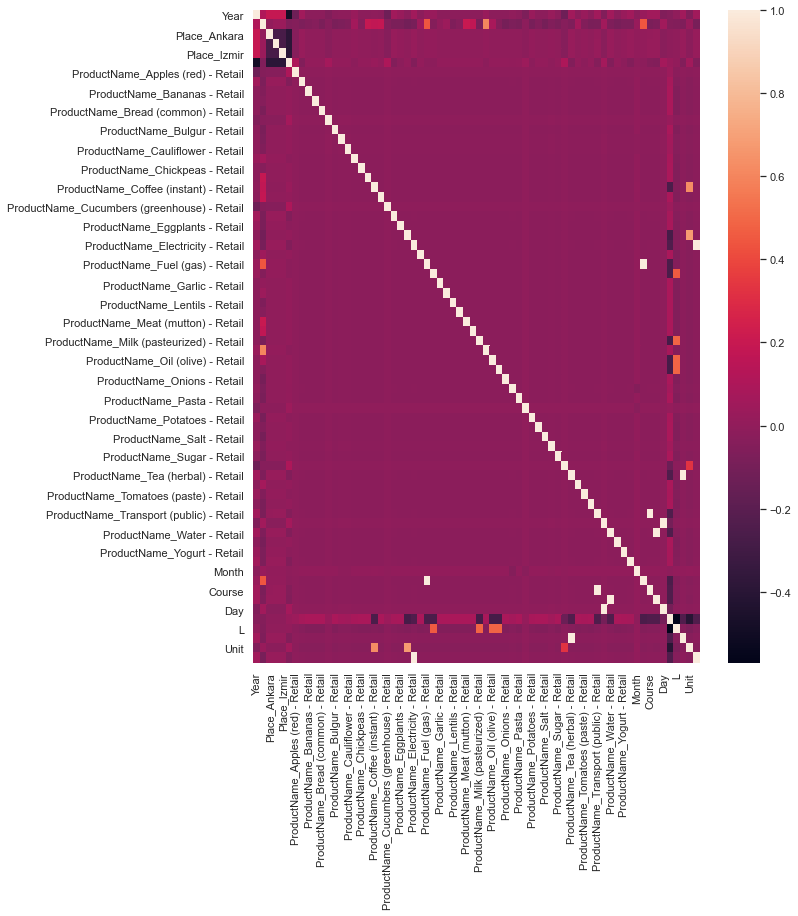

In [100]:
sns.heatmap(df4.corr())

# Classification Techniques
#Classification algorithms = machine learning techniques for predicting 
#most common algorithms for predicting a categorical outcome: 

In [ ]:
# STILL WORKIN ON THIS PART> do not copy -- different dataset

## Support Vector Machines
## Naive Bayes
## Logistic Regression
## Decision Trees
## Neural Networks
(https://medium.com/@srnghn/machine-learning-trying-to-predict-a-categorical-outcome-6ba542b854f5)

VARIOUS ACCURACY SCORE USED :
Support Vector Machines
 Naive Bayes
Logistic Regression
Decision Trees
Neural Networks
Training & test accuracy:  ~ %
========================================================= 
Decision Tree training accuracy: 60.54 % Random Forest training accuracy: 68.2 % ========================================================= 
Decision Tree test accuracy 61.07 % Random Forest test accuracy 66.41 %


In [101]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [102]:
#declare 4 variables
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)



# Random Forest

In [162]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#declare 4 variables
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)


#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of the  model is ' + str(round(accuracy, 2)) + '%.')

Accuracy of the  model is 50.38%.


In [163]:
# CM

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[42 21]
 [44 24]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.49      0.67      0.56        63
           1       0.53      0.35      0.42        68

    accuracy                           0.50       131
   macro avg       0.51      0.51      0.49       131
weighted avg       0.51      0.50      0.49       131





In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

pred_train = clf.predict(train_scaled)
pred_test = clf.predict(test_scaled)

pd.crosstab(y_test,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])


PRED,0,1
ACTUAL,,
0,32,25
1,24,18


# Area Under ROC Curve (AUROC)

In [167]:
# from sklearn.metrics import roc_auc_score
# prob_y = clf.predict_proba(X_dummy_features)
# prob_y = [p[1] for p in prob_y]
 
# print( roc_auc_score(Y, prob_y) )

from sklearn.metrics import roc_auc_score
prob_y = clf.predict_proba(X_test)
prob_y = [p[1] for p in prob_y]
 
auroc = roc_auc_score(y_test, prob_y)

print ('AUROC Score: %.2f' % auroc)

AUROC Score: 0.56


# Finding Important Features

In [168]:
from sklearn.ensemble import RandomForestClassifier
#declare 4 variables
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)


#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


RandomForestClassifier()

In [169]:
RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini',
            max_depth = None, max_features = 'auto', max_leaf_nodes = None,
            min_impurity_decrease = 0.0, min_impurity_split = None,
            min_samples_leaf = 1, min_samples_split = 2,
            min_weight_fraction_leaf = 0.0, n_estimators = 100, n_jobs = 1,
            oob_score = False, random_state = None, verbose = 0,
            warm_start = False)

RandomForestClassifier(n_jobs=1)

In [170]:
features = X.columns
feature_importance = pd.Series(clf.feature_importances_,index = features).sort_values(ascending = False)
feature_importance.nlargest(10)

Training_Total                  0.108019
Architecting on AWS             0.084859
AWS Technical Essentials        0.056570
Developing on AWS               0.048871
Systems Operations on AWS       0.042857
Advanced Architecting on AWS    0.027325
DevOps Engineering on AWS       0.027089
AWS Technical Essentials Day    0.024065
AWS_Terr_Seg_ ENT               0.022975
Big Data on AWS                 0.022930
dtype: float64

In [171]:
data = df4

In [172]:
feature_importance.nsmallest(10)


AWSome Day                                                                                    0.000000
AWS Solutions Training for Partners- SAP on AWS - Technical                                   0.000000
AWS Certification Exam Readiness Workshop- AWS Certified Developer ‚- Associate -Inactive-    0.000000
Exam Readiness- AWS Certified DevOps Engineer ‚- Professional                                 0.000058
Advanced Developing on AWS                                                                    0.000102
AWS Solutions Training for Partners- Foundations - Business -Public Sector-                   0.000111
AWS Professional Services- Cloud Adoption Framework -Classroom-                               0.000170
AWS_Terr_Region_ ITALY                                                                        0.000216
AWS Professional Services- Cloud Advisory -Classroom-                                         0.000222
AWS Solutions Training for Partners- Migrating to AWS - Technical        

In [173]:
my_importance_model = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1)
my_importance_model.fit(X, y)
print(my_importance_model.feature_importances_)

[1.17547543e-02 1.01919040e-02 2.21574382e-02 2.01500316e-02
 1.15632171e-02 1.16324160e-02 1.63048274e-02 1.14009748e-02
 6.62233467e-03 1.41205001e-02 1.12798334e-02 2.55330904e-03
 8.68474510e-03 4.99615772e-03 6.43492950e-03 3.56519266e-03
 1.16733842e-02 6.00387795e-03 1.74389324e-03 1.10909885e-02
 3.31396263e-03 5.09353916e-03 6.64441569e-04 7.75831478e-03
 5.35430439e-03 8.55029605e-03 1.17166943e-03 2.40979145e-03
 2.87114755e-03 4.40323355e-03 4.23649673e-03 3.60646954e-03
 1.54400268e-04 3.23474834e-03 6.29806709e-03 1.09387404e-02
 6.17786109e-03 4.16318774e-03 4.35267478e-03 6.00470060e-03
 5.77089816e-03 4.35487101e-03 4.13255568e-03 1.97660767e-03
 9.06629811e-03 2.49531312e-03 9.86737396e-03 5.72876562e-03
 1.83644698e-03 2.51100460e-03 2.70680661e-03 3.77146144e-03
 1.02477981e-02 1.42052194e-02 1.25365141e-02 1.76887476e-02
 1.41097669e-02 7.33576355e-03 9.78354371e-05 5.36785027e-04
 4.15006543e-03 2.36662983e-03 4.89300076e-03 1.71469124e-04
 2.65490978e-04 4.398332

# EDA

No handles with labels found to put in legend.


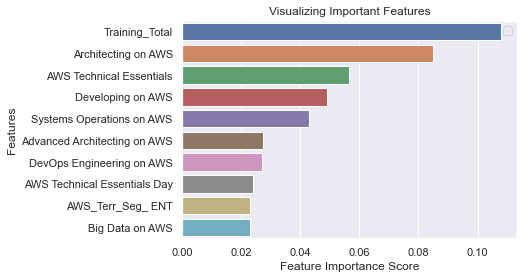

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_importance = feature_importance.nlargest(10)
sns.barplot(x = feature_importance, y = feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

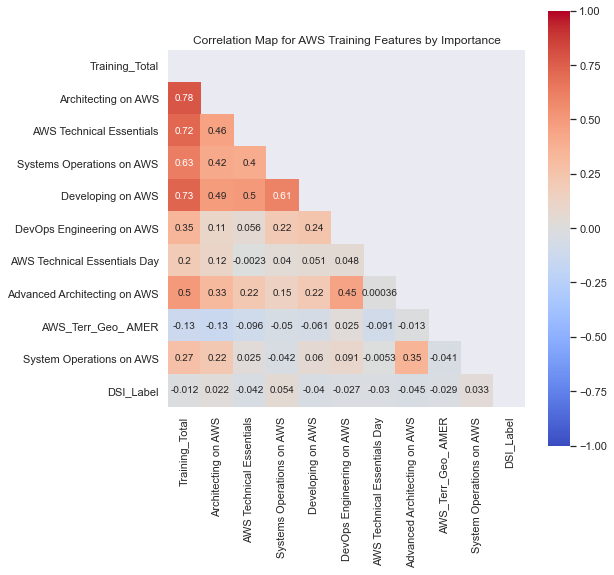

In [175]:
Important_features = df4[['Training_Total', 
'Architecting on AWS' ,          
'AWS Technical Essentials' ,  
'Systems Operations on AWS' ,
'Developing on AWS' ,
'DevOps Engineering on AWS' ,
'AWS Technical Essentials Day' ,
'Advanced Architecting on AWS' ,
'AWS_Terr_Geo_ AMER' ,
'System Operations on AWS',
       'DSI_Label']]

plt.figure(figsize=(8, 8))
matrix = np.triu(Important_features.corr())
#sns.heatmap(df_dummy.corr(), annot = True, square = True, mask = matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

sns.heatmap(Important_features.corr(), annot = True, square = True, 
            mask = matrix, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', 
            annot_kws={"fontsize":10})

plt.title('Correlation Map for AWS Training Features by Importance')
plt.show()

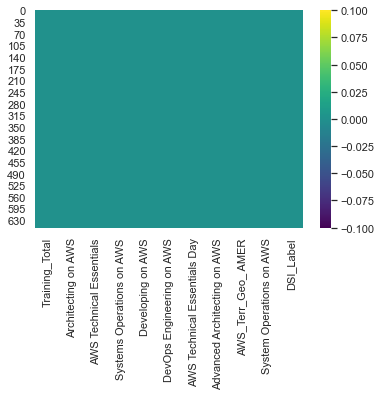

In [176]:
#the proportion of NaN values 
sns.heatmap(Important_features.isnull(), cmap='viridis')

# COMPARISON OF CV  SCALED vs UNSCALED ACCURACY RATES

In [177]:
# L R
#declare 4 variables
X_train, X_test, y_train, y_test  = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)
cv_score1LR = cross_val_score(LogisticRegression(),
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
print(cv_score1LR)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)
cv_score2LR = cross_val_score(LogisticRegression(), 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)

print(cv_score2LR)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[0.48850575 0.54597701 0.48275862]
[0.56896552 0.51724138 0.47126437]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


In [178]:
# Decision Tree
#declare 4 variables
X_train, X_test, y_train, y_test  = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)

clf = DecisionTreeClassifier()
cv_score1DT = cross_val_score(clf, 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
print(cv_score1DT)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)

clf = DecisionTreeClassifier()
cv_score2DT = cross_val_score(clf, 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
print(cv_score2DT)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[0.47126437 0.49425287 0.51724138]
[0.48275862 0.50574713 0.44827586]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


In [179]:
#declare 4 variables
X_train, X_test, y_train, y_test  = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)


rfc = RandomForestClassifier(n_estimators=200)
cv_score1RF = cross_val_score(rfc, 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
print(cv_score1RF)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)

rfc = RandomForestClassifier(n_estimators=200)
cv_score2RF = cross_val_score(rfc, 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
print(cv_score2RF)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[0.52298851 0.52873563 0.54022989]
[0.47701149 0.50574713 0.49425287]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


In [180]:

#Create a Gaussian Classifier
GNB_model = GaussianNB()

In [181]:
#declare 4 variables
X_train, X_test, y_train, y_test  = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)

knn = KNeighborsClassifier(n_neighbors = 22)
cv_score1knn = cross_val_score(knn, 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
print(cv_score1knn)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)

rfc = RandomForestClassifier(n_estimators=200)
cv_score2knn = cross_val_score(knn, 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
print(cv_score1knn)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[0.55747126 0.53448276 0.54022989]
[0.55747126 0.53448276 0.54022989]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [182]:
#declare 4 variables
X_train, X_test, y_train, y_test  = train_test_split(scaled_inputs, targets, train_size = 0.8, shuffle = True, random_state = 20)


GBC = GradientBoostingClassifier()
cv_score1gbc = cross_val_score(knn, 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
print(cv_score1gbc)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)

rfc = RandomForestClassifier(n_estimators=200)
cv_score2gbc = cross_val_score(knn, 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
print(cv_score2gbc)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[0.55747126 0.53448276 0.54022989]
[0.47126437 0.5        0.47126437]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


In [187]:
print ("===================================================================================")
print ("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("------- MACHINE LEARNING CLASSIFIERS ----------( ML     TRAINING     TEST ) ")
print ("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print ("===================================================================================")
print("Logistic Regression Accuracy Score - SCALED:   ",cv_score1LR)

print("Logistic Regression Accuracy Score - UNSCALED: ",cv_score2LR)

print ("===================================================================================")

print("Decision Tree Accuracy Score - SCALED:         ",cv_score1DT)
print("Decision Tree Accuracy Score - UNSCALED:       ",cv_score2DT)
print ("===================================================================================")


print("Random Forest Accuracy Score - SCALED:         ",cv_score1RF)
print("Random Forest Accuracy Score - UNSCALED:       ", cv_score2RF)
print ("===================================================================================")



print("K-Nearest Neighbor Acc. Score - SCALED:        ",cv_score1knn)
print("K-Nearest Neighbor Acc. Score - UNSCALED:      ", cv_score2knn)
print ("===================================================================================")

print("Gradient Boost Accuracy Score - SCALED:         ",cv_score1gbc)
print("Gradient Boost Accuracy Score - UNSCALED:       ",cv_score2gbc)
print ("===================================================================================")




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------- MACHINE LEARNING CLASSIFIERS ----------( ML     TRAINING     TEST ) 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Logistic Regression Accuracy Score - SCALED:    [0.48850575 0.54597701 0.48275862]
Logistic Regression Accuracy Score - UNSCALED:  [0.56896552 0.51724138 0.47126437]
Decision Tree Accuracy Score - SCALED:          [0.47126437 0.49425287 0.51724138]
Decision Tree Accuracy Score - UNSCALED:        [0.48275862 0.50574713 0.44827586]
Random Forest Accuracy Score - SCALED:          [0.52298851 0.52873563 0.54022989]
Random Forest Accuracy Score - UNSCALED:        [0.47701149 0.50574713 0.49425287]
K-Nearest Neighbor Acc. Score - SCALED:         [0.55747126 0.53448276 0.54022989]
K-Nearest Neighbor Acc. Score - UNSCALED:       [0.47126437 0.5        0.47126437]
Gradient Boost Accuracy Score - SCALED:          [0.55747126 0.53448276 0.54022989]
Gradien